# Analyzing
To get a better idea of the structure of the csv files, some methods for analyzing and visualizing can be found here.

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="darkgrid")
import os
import warnings
# Root CSV files directory
dirname = "./data/"

### Load

In [4]:
listfile = os.listdir(dirname)
data = []
for wordname in listfile:
    if wordname == ".DS_Store":
        continue
    for csv in os.listdir(dirname + wordname):
        filepath = os.path.join(dirname, wordname, csv)
        content = pd.read_csv(filepath, sep=';')
        data.append((wordname, content))

## Frame count distribution per word

In [53]:
row_lengths
for (word, content) in data:
    row_lengths[word] = []
for (word, content) in data:
    row_lengths[word].append(content.shape[0])
print(row_lengths)

{'Welt': [62, 59, 51, 14, 52, 56, 54, 52, 76, 39, 48, 53, 64, 54, 58, 50, 57, 82, 0, 47, 56, 5, 74, 65, 52, 49, 55, 50, 60, 63, 55, 66, 44, 86, 37, 75, 81, 58, 62, 78, 36, 41, 48, 22, 47, 52, 40, 44, 52, 53, 60, 18, 54, 67, 69, 67, 60, 64, 56, 56, 56, 68, 56, 49, 32, 83, 13, 58, 49, 47, 55, 50, 2, 50, 60, 14, 49, 27, 83, 76, 58, 63, 68, 54, 72, 61], 'Deutschland': [38, 29, 50, 19, 48, 23, 56, 36, 22, 40, 32, 33, 36, 34, 37, 28, 29, 31, 33, 39, 27, 50, 47, 40, 42, 35, 42, 45, 39, 41, 35, 36, 30, 36, 39, 8, 17, 42, 53, 44, 35, 27, 17, 37, 32, 46, 41, 29, 10, 45, 9, 11, 42, 48, 27, 27, 3, 15, 26, 35, 46, 45, 21, 52, 32, 34, 96, 43, 26, 33, 15, 44, 36, 38, 37, 38, 42, 28, 43, 37, 40, 35, 25, 39, 46, 47], 'Hallo': [45, 4, 30, 43, 40, 23, 23, 59, 25, 34, 32, 56, 35, 3, 13, 39, 9, 26, 31, 9, 35, 44, 41, 3, 19, 34, 49, 30, 43, 42, 42, 46, 1, 29, 34, 34, 33, 23, 26, 33, 31, 27, 0, 9, 28, 3, 23, 10, 14, 36, 12, 7, 26, 21, 6, 36, 42, 46, 28, 44, 32, 32, 32, 44, 41, 31, 7, 11, 62, 36, 33, 44, 5, 3

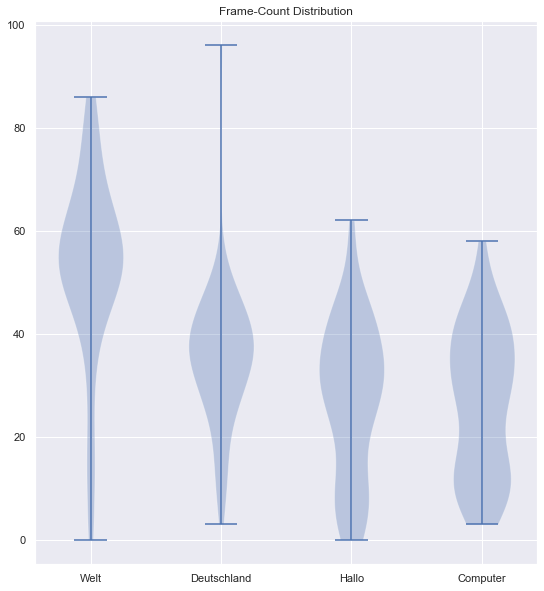

In [75]:
all_data = row_lengths.values()
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9,10))

# plot violin plot
axs.violinplot(all_data)
axs.set_title('Frame-Count Distribution')
plt.setp(axs, xticks=[y + 1 for y in range(len(all_data))],
         xticklabels=row_lengths.keys())
plt.show()